# Forecasting U.S. Nuclear Energy Production (Time Series Analysis and Forecasting)

## Introduction

This project analyzes and forecasts U.S. nuclear electric power production using time series methods. The goal is to uncover trends and generate short-term forecasts to support informed discussions around energy planning and policy.

**Dataset Source:** "Primary energy production by source" dataset from [U.S. Energy Information Administration](https://www.eia.gov/totalenergy/data/annual/index.php)

**Time Period:** January 1973 to January 2025

**Tools Used:** pandas, matplotlib, statsmodels, sklearn, seaborn, pmdarima

## Importing Libraries

We begin by importing the necessary libraries for data manipulation, visualization, time series modeling, and evaluation.


In [102]:
# data handling/manipulation
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# TS analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

# model evaluation
from math import sqrt
from sklearn.metrics import mean_squared_error

# misc
import os
import warnings

We set the working directory to ensure that the notebook has access to the dataset and any other relevant files. 

In [103]:
# change WD (if necessary)
#os.getcwd()
#os.chdir('./Energy Time Series')

## Data Loading and Preprocessing

We begin by loading the energy production dataset. Here, we preview the first and last few rows, and check the data types to understand the structure of the dataset.

In [104]:
# read in data
df = pd.read_excel("Table_1.2_Primary_Energy_Production_by_Source.xlsx", header = 10, skiprows = [11])

# print the first 5 rows 
df.head()

,Month,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric Power Production,Geothermal Energy Production,Solar Energy Production,Wind Energy Production,Biomass Energy Production,Total Renewable Energy Production,Total Primary Energy Production
0,1973-01-01,1.166486,1.908249,1.649833,0.208064,4.932632,0.068103,0.089562,0.000490,Not Available,Not Available,0.129787,0.219839,5.220574
1,1973-02-01,1.086072,1.922543,1.525783,0.195184,4.729582,0.064634,0.079544,0.000448,Not Available,Not Available,0.117338,0.197330,4.991545
2,1973-03-01,1.196571,1.868430,1.667094,0.214807,4.946902,0.072494,0.088284,0.000464,Not Available,Not Available,0.129938,0.218686,5.238082
3,1973-04-01,1.112230,1.777561,1.616791,0.209690,4.716271,0.064070,0.083152,0.000542,Not Available,Not Available,0.125636,0.209330,4.989672
4,1973-05-01,1.216978,1.859241,1.665377,0.215398,4.956995,0.062111,0.085643,0.000505,Not Available,Not Available,0.129834,0.215982,5.235087


In [105]:
# print last 5 rows
df.tail()

,Month,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric Power Production,Geothermal Energy Production,Solar Energy Production,Wind Energy Production,Biomass Energy Production,Total Renewable Energy Production,Total Primary Energy Production
620,2024-09-01,0.943470,3.166996,2.250233,0.768275,7.128975,0.654927,0.056864,0.009561,0.100739,0.098932,0.427087,0.693182,8.477084
621,2024-10-01,0.914618,3.307502,2.372045,0.801552,7.395717,0.614299,0.053982,0.009473,0.094938,0.136664,0.436714,0.731771,8.741787
622,2024-11-01,0.845697,3.204110,2.278794,0.782047,7.110647,0.647021,0.062357,0.009502,0.070004,0.139757,0.444579,0.726200,8.483868
623,2024-12-01,0.880503,3.393838,2.372244,0.790750,7.437335,0.744183,0.069551,0.010145,0.064924,0.137651,0.452055,0.734326,8.915845
624,2025-01-01,0.908476,3.346994,2.318478,0.743998,7.317946,0.749815,0.072308,0.010085,0.074239,0.148866,0.434097,0.739595,8.807357


In [106]:
# check data types
print(df.dtypes)

Month                                   datetime64[ns]
Coal Production                                float64
Natural Gas (Dry) Production                   float64
Crude Oil Production                           float64
Natural Gas Plant Liquids Production           float64
Total Fossil Fuels Production                  float64
Nuclear Electric Power Production              float64
Hydroelectric Power Production                 float64
Geothermal Energy Production                   float64
Solar Energy Production                         object
Wind Energy Production                          object
Biomass Energy Production                      float64
Total Renewable Energy Production              float64
Total Primary Energy Production                float64
dtype: object


Here, we convert the Month column to an index so that we can treat the data as a time series. This enables time-based operations such as rolling averages and forecasting.

In [107]:
# convert month to index column
df.index = df['Month']
del df['Month']

In [108]:
# check first 5 rows again
df.head()

,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric Power Production,Geothermal Energy Production,Solar Energy Production,Wind Energy Production,Biomass Energy Production,Total Renewable Energy Production,Total Primary Energy Production
Month,,,,,,,,,,,,,
1973-01-01,1.166486,1.908249,1.649833,0.208064,4.932632,0.068103,0.089562,0.000490,Not Available,Not Available,0.129787,0.219839,5.220574
1973-02-01,1.086072,1.922543,1.525783,0.195184,4.729582,0.064634,0.079544,0.000448,Not Available,Not Available,0.117338,0.197330,4.991545
1973-03-01,1.196571,1.868430,1.667094,0.214807,4.946902,0.072494,0.088284,0.000464,Not Available,Not Available,0.129938,0.218686,5.238082
1973-04-01,1.112230,1.777561,1.616791,0.209690,4.716271,0.064070,0.083152,0.000542,Not Available,Not Available,0.125636,0.209330,4.989672
1973-05-01,1.216978,1.859241,1.665377,0.215398,4.956995,0.062111,0.085643,0.000505,Not Available,Not Available,0.129834,0.215982,5.235087


We create a new dataframe containing just the nuclear column, effectively dropping the other columns (as we are not interested in them for this analysis)

In [109]:
# create nuclear-exclusive df
nuclear = df[["Nuclear Electric Power Production"]].copy()

Finally, we visualize the overall trend of Nuclear Electric Power Production over time.

Text(0, 0.5, 'Nuclear Electric Power Production (Quadrillion BTU)')

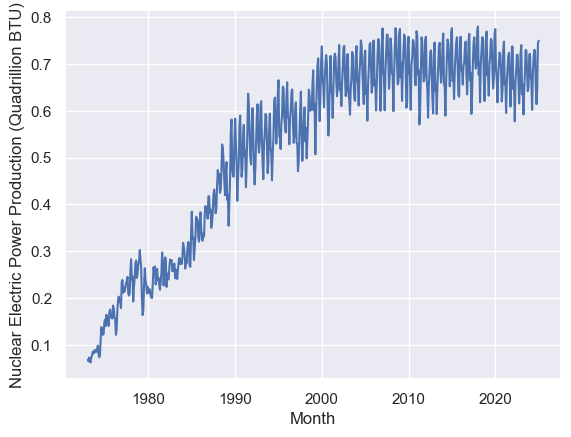

In [110]:
# create lineplot for nuclear energy
sns.lineplot(nuclear, legend=False)
plt.ylabel("Nuclear Electric Power Production (Quadrillion BTU)")

## Time Series Analysis

We analyze the nuclear energy production data to detect underlying trends, seasonality, and stationarity.

First, we create a rolling mean and std. These are useful for determining stationarity, an important assumption in forecasting. Basically, stationarity means that your data is overall unchanging and can use certain prediction tools (e.g. ARIMA).

In [111]:
# create rolling mean and std (7 months)
rolling_mean = nuclear.rolling(7).mean()
rolling_std = nuclear.rolling(7).std()

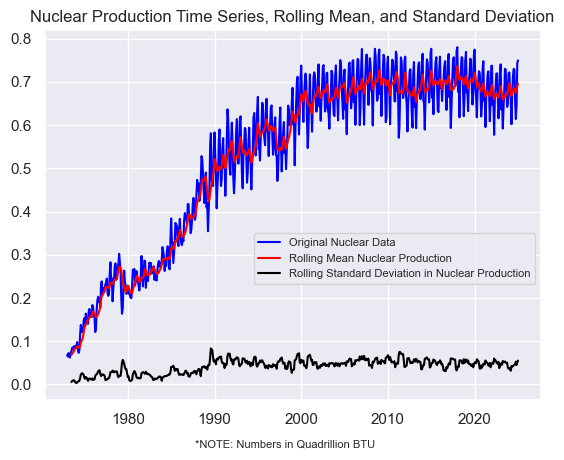

In [112]:
# create plot with original TS and rolling mean and STD
plt.plot(nuclear, color='blue', label="Original Nuclear Data")
plt.plot(rolling_mean, color='red', label='Rolling Mean Nuclear Production')
plt.plot(rolling_std, color='black', label='Rolling Standard Deviation in Nuclear Production')
plt.figtext(0.5, 0.01, '*NOTE: Numbers in Quadrillion BTU', wrap=True, horizontalalignment='center', fontsize=8)
plt.title("Nuclear Production Time Series, Rolling Mean, and Standard Deviation")
plt.legend(loc="lower right", bbox_to_anchor=(1, 0.3), prop={'size':8})

While the rolling standard deviation remains relatively stable, the rolling mean shows a sharp rise before leveling off around the year 2000. This suggests a structural shift in nuclear energy production.

We will now run the ADF (Augmented Dickey-Fuller) test to further check the stationarity. 

In [113]:
# run Dickey-Fuller test
adft = adfuller(nuclear, autolag="AIC")

In [114]:
# check the results of the Dickey-Fuller test
output_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"], "Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
print(output_df)

                        Metric      Values
0              Test Statistics   -3.443766
1                      p-value    0.009554
2             No. of lags used   16.000000
3  Number of observations used  608.000000
4          critical value (1%)   -3.441151
5          critical value (5%)   -2.866305
6         critical value (10%)   -2.569308


Since the AUF test gives a p-value below 0.05, we reject the null hypothesis and conclude that the data is stationary.

Next, we will check the autocorrelation, an important component of time series forecasting. Basically, autocorrelation is a measure of how useful past data is in predicting future data.

In [115]:
# check autocorrelation (one-month lag)
autocorrelation_lag1 = nuclear['Nuclear Electric Power Production'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = nuclear['Nuclear Electric Power Production'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = nuclear['Nuclear Electric Power Production'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = nuclear['Nuclear Electric Power Production'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.9723837193321938
Three Month Lag:  0.922024113639393
Six Month Lag:  0.9754556906264207
Nine Month Lag:  0.9157840675932979


The autocorrelations for one, three, six, and nine-month lags suggest that past data is good at predicting future data.

Now, we will perform trend decomposition. This basically breaks a time series down into separate components, in order to understand its underlying patterns. The components are:
* **trend**, long-term direction (e.g. up, down, constant)
* **seasonality**, repearing short-term fluctuations at regular intervals (e.g. monthly, yearly)
* **residual/noise**, random fluctuations remaining after removing trend and seasonality

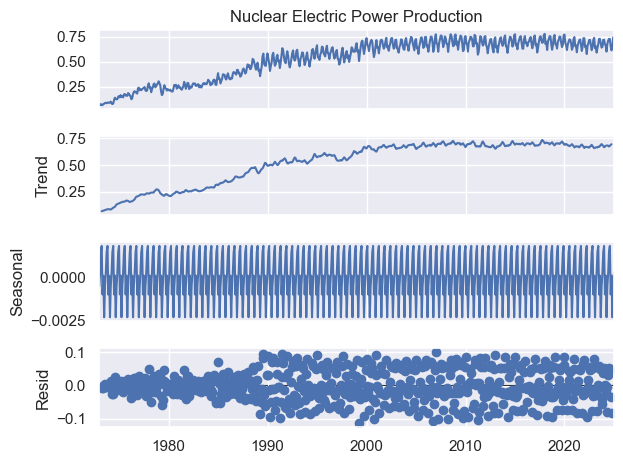

In [116]:
decompose = seasonal_decompose(nuclear['Nuclear Electric Power Production'], model='additive', period=7)
decompose.plot()
plt.show()

We see from the trend decomposition that there is an overall increasing trend that levels off and becomes constant; that there may be high-frequency seasonality; and that residuals increase around 1990, which can indicate sudden volatility or shifts in external factors. 

## Time Series Forecasting

We forecast future production based on past behavior, while accounting for complex fluctuations and long-term changes in the energy sector.

First, we split the data in to train and test groups. This is important for "testing" our predictions to see if they hold up against real data. We cut the data at the September 2023 datapoint -- any datapoints beforehand are train data, and any afterwards are test data.

In [117]:
# split train and test

nuclear['Date'] = nuclear.index
train = nuclear[nuclear['Date'] < "2023-09-01"].copy()
train['train'] = train['Nuclear Electric Power Production']
del train['Date']
del train['Nuclear Electric Power Production']

test = nuclear[nuclear['Date'] > "2023-09-01"].copy()
del test['Date']
test['test'] = test['Nuclear Electric Power Production']

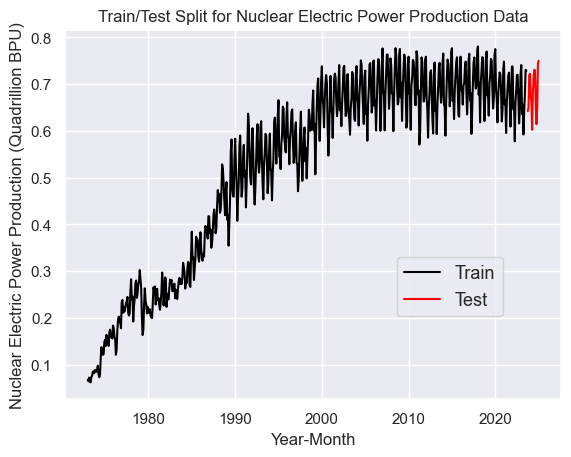

In [118]:
# plot the split of train and test
plt.plot(train.index, train['train'], color='black', label='Train')
plt.plot(test.index, test['test'], color='red', label='Test')
plt.title("Train/Test Split for Nuclear Electric Power Production Data")
plt.ylabel("Nuclear Electric Power Production (Quadrillion BPU)")
plt.xlabel('Year-Month')
plt.legend(loc="lower right", bbox_to_anchor=(.9, 0.2), prop={'size':13})
sns.set()
plt.show()

We can see from the visualization that most of the data is train, and just a small, recent trend is test.

Now, we train a model to forecast future data using the training data. We are using ARIMA (AutoRegressive Integrated Moving Average), a popular statistical model used for forecasting time series data. Essentially, it creates a best-fitting model, accounting for the data's autocorrelation, stationarity, and short-term fluctuations.

We are using auto_arima from the pmdarima library, as it automatically identifies the best ARIMA model for given time-series data, without a need to tune hyperparameters.

In [119]:
# filter warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# run auto arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warning=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index=test.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2322.420, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1981.034, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1982.512, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1984.712, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1982.711, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2167.930, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2264.923, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2542.398, Time=0.66 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2385.895, Time=0.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-2405.987, Time=0.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-2495.947, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2527.130, Time=0.70 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-2409.167, Time=0.69 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-2391.579, Time=0.87 sec
 ARIMA(3,1,2)(0,0,0

The best model found by auto_arima is ARIMA(3,1,5)(0,0,0)[0]:

* **AR(3)**: The model uses 3 previous time steps to predict the next value.
* **I(1)**: The data is differenced once to make it stationary.
* **MA(5)**: The model accounts for the last 5 residual errors to adjust the predictions.
* **(0,0,0)[0]**: There is no seasonal component considered, indicating that seasonality is not a significant factor in the data.

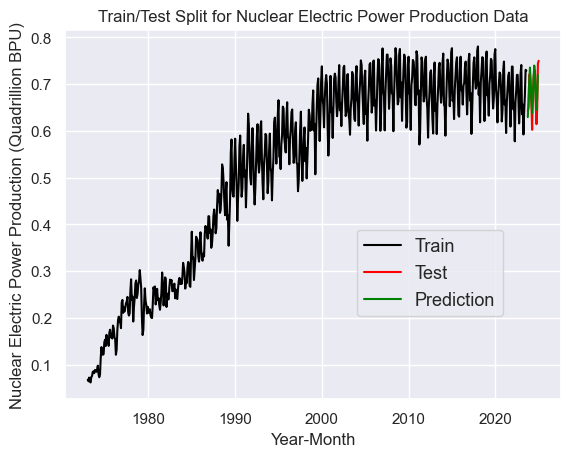

In [120]:
# plot train/test and prediction
plt.plot(train.index, train['train'], color='black', label='Train')
plt.plot(test.index, test['test'], color='red', label='Test')
plt.plot(forecast, color='green', label='Prediction')
plt.title("Train/Test Split for Nuclear Electric Power Production Data")
plt.ylabel("Nuclear Electric Power Production (Quadrillion BPU)")
plt.xlabel('Year-Month')
plt.legend(loc="lower right", bbox_to_anchor=(.9, 0.2), prop={'size':13})
sns.set()
plt.show()

We see from the visualization that the prediction data fits the test data fairly well, supporting the predictive power of model that we have created.

## Model Evaluation

The model's performance is evaluated using the RMSE metric to ensure accurate forecasts and a good fit to the data.

First, we check the number of NaN values in the test and prediction sets, as the presence of NaN values will cause an error.

In [121]:
# check NaN values
print(test['test'].isna().sum())
print(forecast['Prediction'].isna().sum())

0
1


Now we will drop the NaN values.

In [122]:
# drop NaN values
forecast = model.predict(n_periods=len(test))
forecast = pd.Series(forecast).dropna()  # remove any NaNs
forecast = pd.DataFrame(forecast.values, index=test.index[:len(forecast)], columns=['Prediction'])

Finally, we will calculate the RMSE (Root Mean Squared Error), a metric used to measure the difference between predicted values and actual values. Basically, it tells us how far off our model's prediction valeus are from the test set's values.

In [123]:
# align and calculate RMSE
y_true, y_pred = test['test'].align(forecast['Prediction'], join='inner')
rms = sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rms)

RMSE: 0.04377066069211586


Our RMSE is 0.04, meaning that our model performs extremely well.

## Conclusion

In conclusion, the U.S.'s nuclear electric energy production was shown to have increased greatly from 1973 to about 2000, when it then leveled off and remained stable up until the present day. The data was shown to be stationary, autocorrelated, and non-seasonal. 

The ARIMA(3,1,5)(0,0,0)[0] model was able to effectively forecast nuclear energy production with a low RMSE of 0.04, indicating good prediction accuracy. However, future work could explore adding seasonal components or external factors to improve the model further. Despite some limitations, this model provides a solid foundation for forecasting nuclear energy production, offering valuable insights for future decision-making.